In [1]:
import pandas as pd

df = pd.read_csv("end_df.csv")

In [28]:
# Filter the DataFrame for rows where 'club_name' is 'Nottingham Forest'
nottingham_forest_df = df[df['club_name'] == 'Nottingham Forest']

# Group by 'first_position' and sum 'value_eur'
nottingham_forest_df.groupby('first_position')['value_eur'].sum().reset_index()


,first_position,value_eur
0,CAM,16500000.0
1,CB,37900000.0
2,CDM,67300000.0
3,CM,14300000.0
4,GK,32650000.0
5,LB,15800000.0
6,LW,8500000.0
7,RB,32000000.0
8,RW,7000000.0
9,RWB,8000000.0


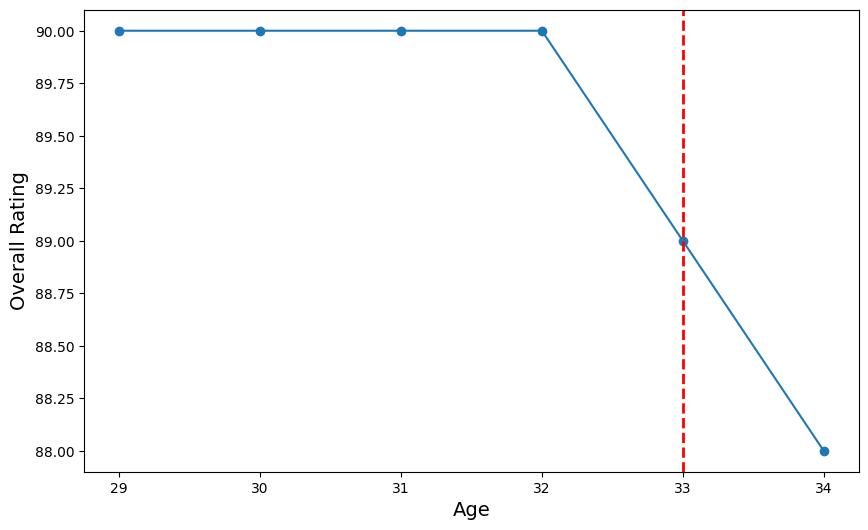

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and already defined

# Step 1: Filter the DataFrame for the player with player_id equal to 'haaland'
player_data = df[df['player_id'] == 202126]

# Assuming 'age' and stat columns are correctly named and present in your DataFrame
# And that player_data contains exactly one row for this player

# Step 2: Prepare the data for plotting
# Extract the current age and increment it for plotting purposes
current_age = player_data['age'].values[0]  # Assuming single match, extracting scalar value
ages = [current_age + i for i in range(6)]  # Age through next 5 years

# Extracting stats for plotting
# Assuming there's only one row for this player, hence using `.values[0]` to get scalar
stats_values = [player_data[stat].values[0] for stat in ['overall', 'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5']]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Since we have 6 ages and 6 stats, we plot them directly
plt.plot(ages, stats_values, '-o')  # '-o' creates a line plot with circles at each data point

plt.xlabel('Age', fontsize = 14)
plt.ylabel('Overall Rating', fontsize = 14)


# Creating a legend (optional if you want to name each point)
stat_names = ['Overall', 'Forward 1', 'Forward 2', 'Forward 3', 'Forward 4', 'Forward 5']
#plt.legend(stat_names, loc='best')
plt.axvline(x=33, color='r', linestyle='--', linewidth=2, label='PA')

plt.grid(False)  # Add grid for better readability
plt.savefig('player_performance2.pdf')

plt.show()


In [6]:
player_data = df[df['player_id'] == '239085']
print(player_data)

Empty DataFrame
Columns: [player_id, short_name, overall, potential, value_eur, wage_eur, age, club_team_id, club_name, league_id, league_name, club_position, nationality_name, release_clause_eur, pace, shooting, passing, dribbling, defending, physic, first_position, ST, CM, CF, GK, LW, CDM, CB, RW, CAM, RB, RM, LB, LM, LWB, RWB, forward_1, forward_2, forward_3, forward_4, forward_5, skill_forward_1, skill_forward_2, skill_forward_3, skill_forward_4, skill_forward_5]
Index: []

[0 rows x 46 columns]


C:\Users\Guilherme Dantas\AppData\Local\Temp\ipykernel_1412\3646310565.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_category'] = filtered_df['age'].apply(categorize_age)


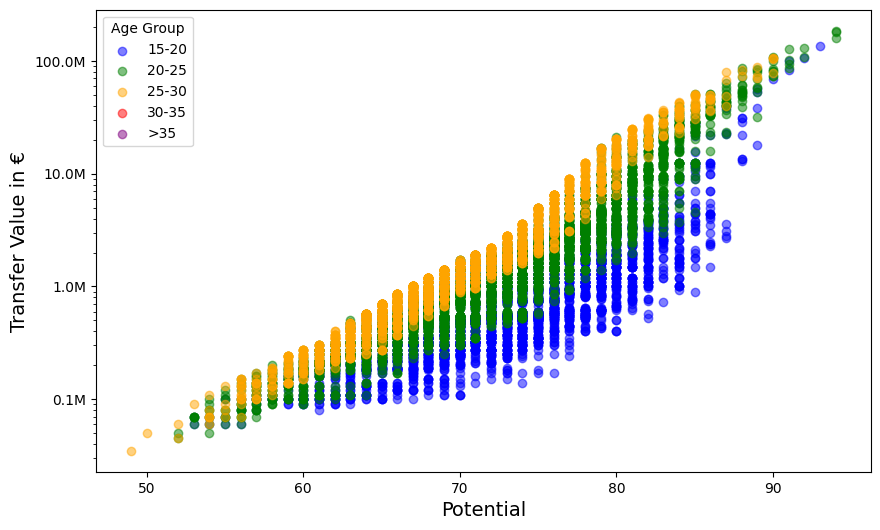

In [16]:
# Assuming 'df' is your DataFrame
from matplotlib.ticker import FuncFormatter

# Define a formatter function that takes a value and its position, returning the formatted string
def millions_formatter(x, pos):
    return f'{x / 1_000_000}M'

# Apply the formatting function to the y-axis
formatter = FuncFormatter(millions_formatter)

filtered_df = df[df['overall'] != df['potential']]

def categorize_age(age):
    if age <= 20:
        return '15-20'
    elif age <= 25:
        return '20-25'
    elif age <= 30:
        return '25-30'
    elif age <= 35:
        return '30-35'
    else:
        return '>35'


filtered_df['age_category'] = filtered_df['age'].apply(categorize_age)
plt.figure(figsize=(10, 6))

# Create the scatter plot
colors = {'15-20': 'blue', '20-25': 'green', '25-30': 'orange', '30-35': 'red', '>35': 'purple'}
# Plot each age category with its respective color
for age_group, color in colors.items():
    age_group_df = filtered_df[filtered_df['age_category'] == age_group]
    plt.scatter(age_group_df['potential'], age_group_df['value_eur'], alpha=0.5, color=color, label=age_group)


# Set the y-axis to logarithmic scale
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(formatter)

# Set labels
plt.xlabel('Potential', fontsize=14)
plt.ylabel('Transfer Value in \N{euro sign}', fontsize=14)
plt.legend(title='Age Group')
# Remove grid
plt.grid(False)

# Save the plot as a PDF
plt.savefig('potential_vs_value_eur.pdf')

plt.show()


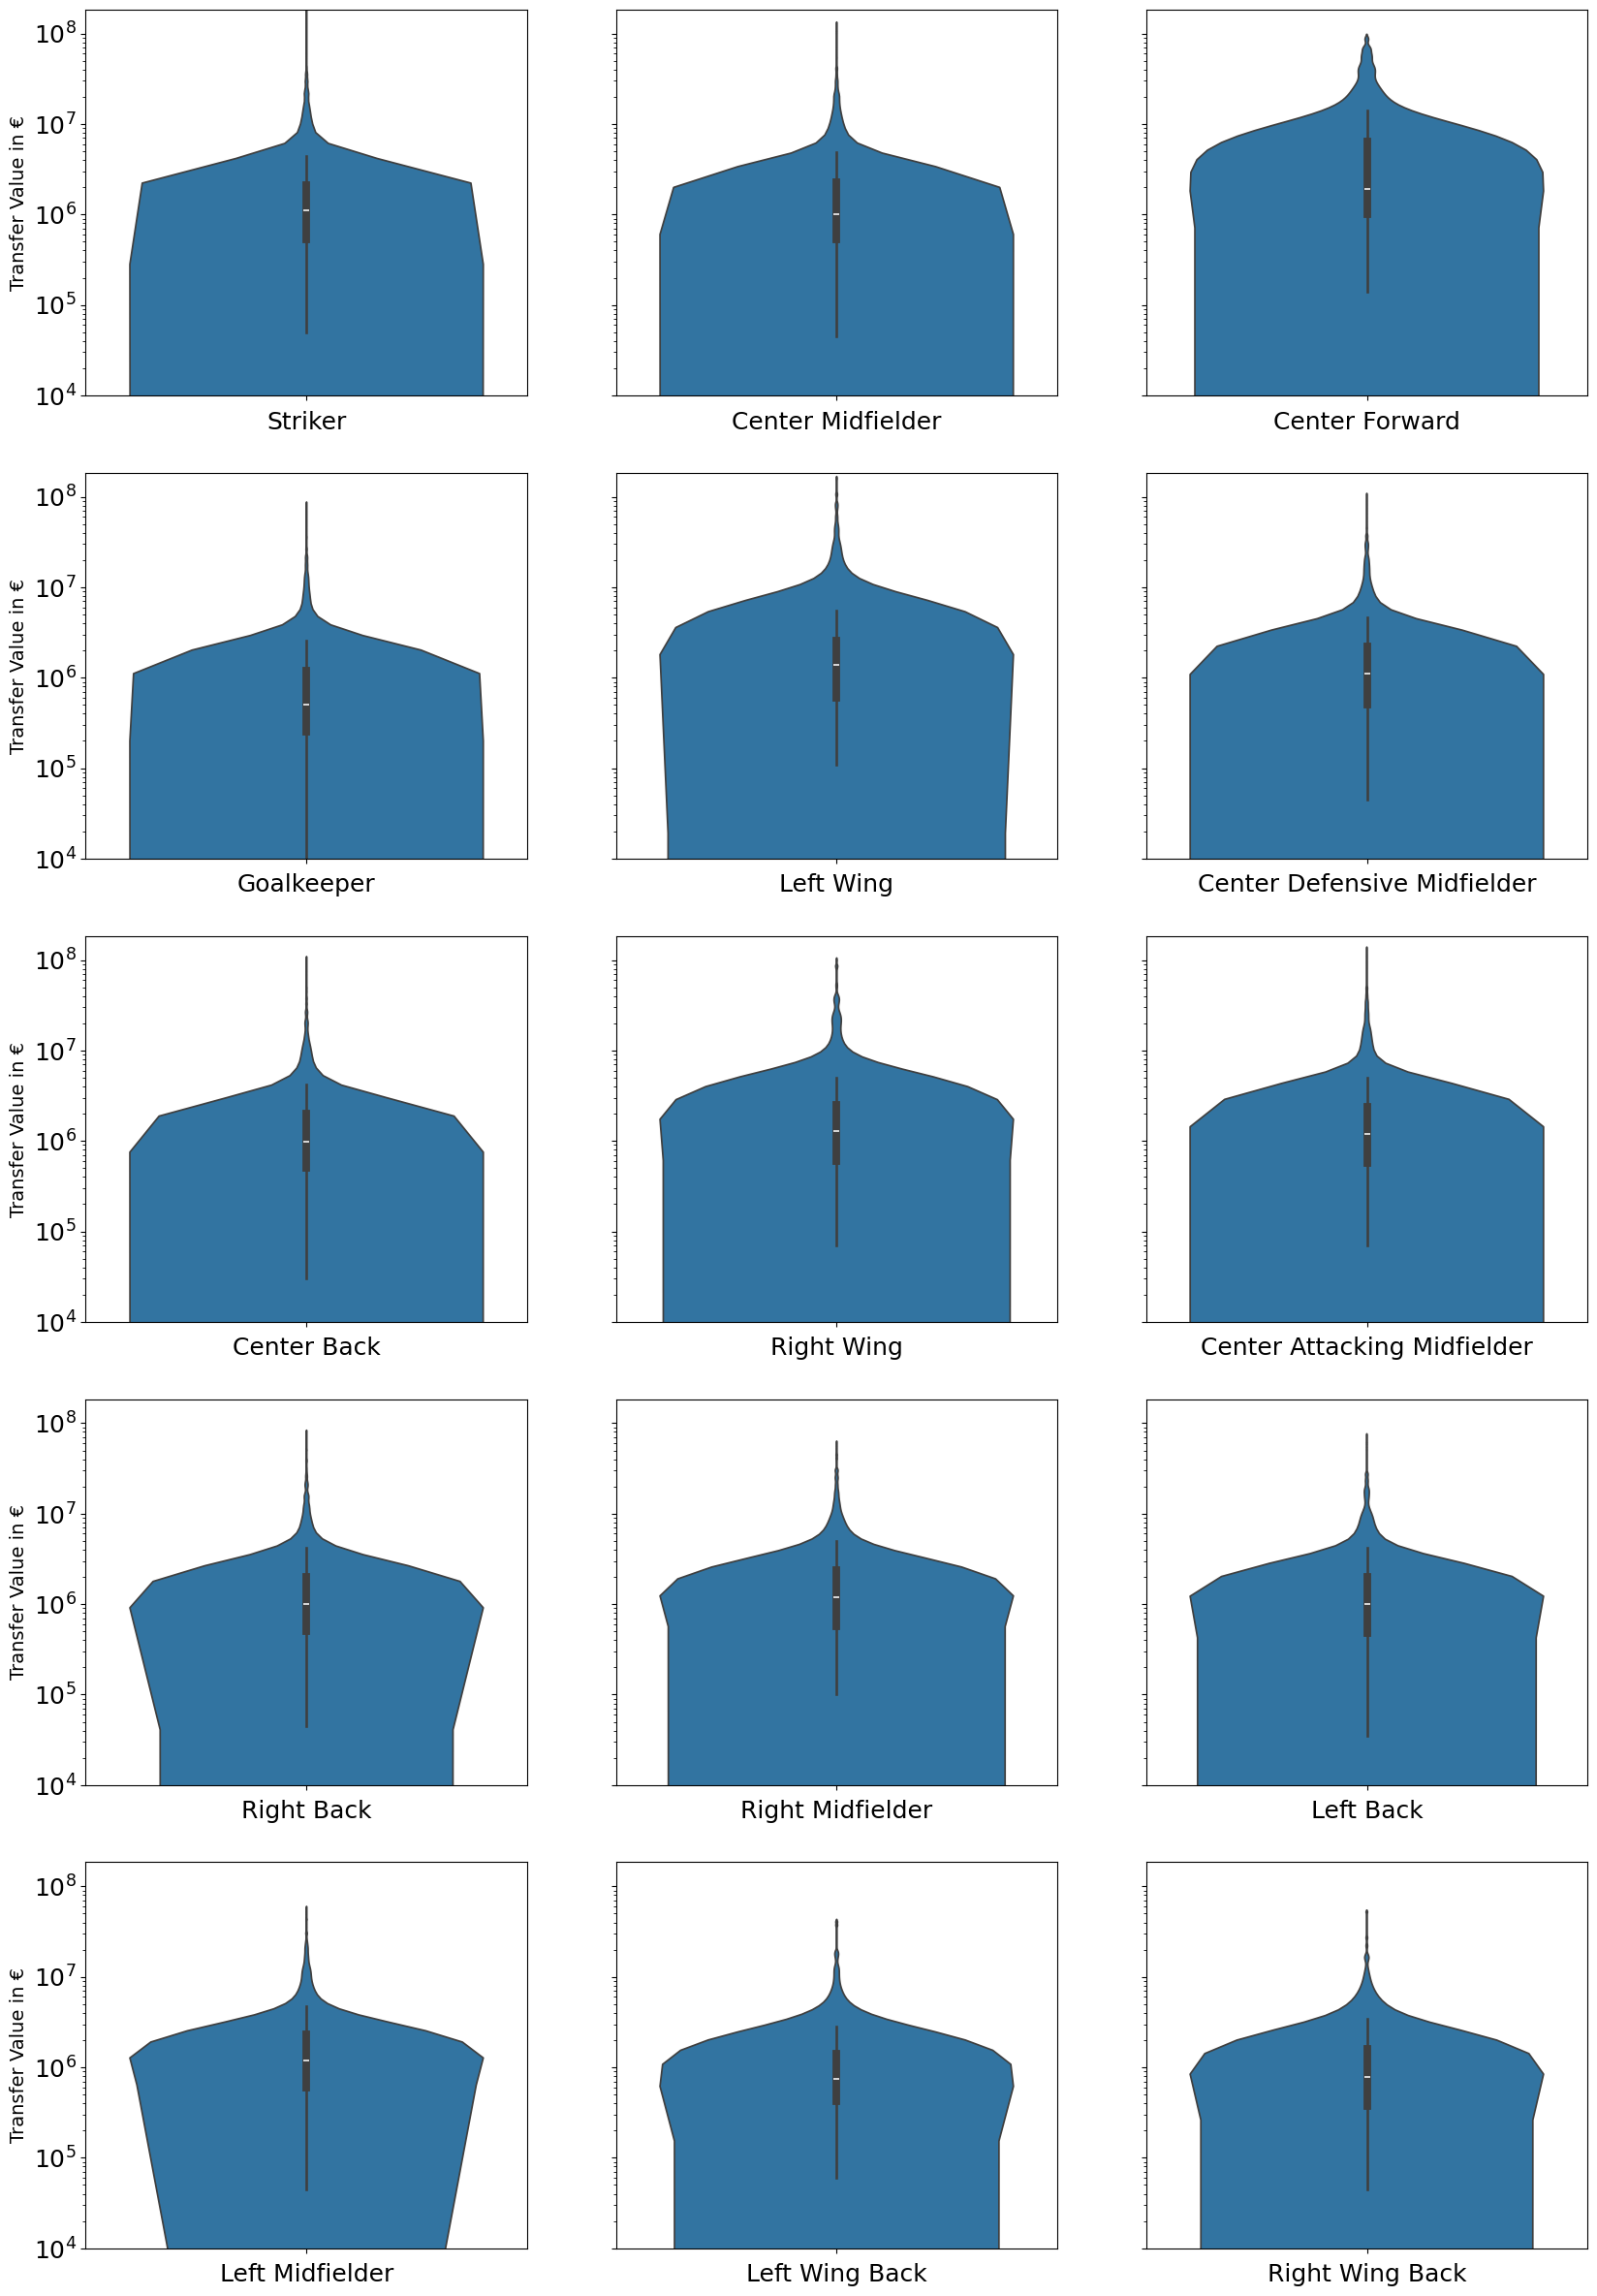

In [8]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

position_map = {
    'GK': 'Goalkeeper',
    'CB': 'Center Back',
    'RB': 'Right Back',
    'LB': 'Left Back',
    'CDM': 'Center Defensive Midfielder',
    'RWB': 'Right Wing Back',
    'LWB': 'Left Wing Back',
    'LM': 'Left Midfielder',
    'CM': 'Center Midfielder',
    'RM': 'Right Midfielder',
    'LW': 'Left Wing',
    'RW': 'Right Wing',
    'CAM': 'Center Attacking Midfielder',
    'CF': 'Center Forward',
    'ST': 'Striker'
}

# Replace the values in 'first_position' column
df['first_role'] = df['first_position'].map(position_map)

def millions_formatter(x, pos):
    return f'{int(x / 1e6)}M'

# Assuming 'df' is your DataFrame
df = df[df['value_eur'] != 0]

# Find unique positions
positions = df['first_role'].unique()
n_positions = len(positions)  

# Determine the global min and max of 'value_eur' to set a common y-axis scale
global_min = df['value_eur'].min()
global_max = df['value_eur'].max()

# Calculate the number of rows and columns needed for the subplots
n_cols = 3  # Setting 4 columns
n_rows = 5
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 30))  # Dynamically adjust figsize based on rows
axes = axes.flatten()  # Flatten to simplify indexing

for i, position in enumerate(positions):
    # Filter the DataFrame for the current position
    subset = df[df['first_role'] == position]
    
    # Create a violin plot for the current subset, on the i-th subplot
    ax = sns.violinplot(x = 'first_role', y='value_eur', data=subset, ax=axes[i])
    
    # Set the same y-axis scale for all plots
    ax.set_ylim(global_min, global_max)
    ax.set_xlabel(position, fontsize = 18)
    ax.set_xticklabels([])
    ax.set_yscale('log')
    ax.tick_params(axis='y', which='major', labelsize=18)  
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


    if i % n_cols == 0:
        ax.set_ylabel('Transfer Value in \N{euro sign}', fontsize=14)
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])

    
    # Optionally set a title or adjust ticks here

# Hide any unused subplot axes (useful if the number of unique positions does not exactly fill the grid)
plt.savefig('violin_plot.pdf', bbox_inches='tight')
plt.show()


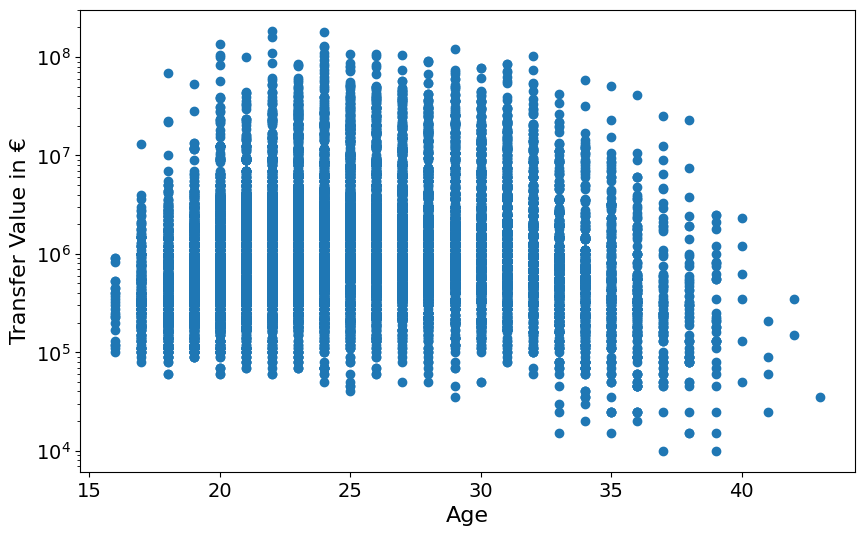

In [98]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame

# Define a custom formatting function for the y-axis to display values in millions
def millions_formatter(x, pos):
    """Convert numbers to 'M' for millions"""
    return f'{int(x / 1e6)}M'

fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with 'age' on the x-axis and 'value_eur' on the y-axis
ax.scatter(df['age'], df['value_eur'])

# Apply the custom formatter to the y-axis to display values in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Set the axis labels and title
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Transfer Value in €', fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=14)  
ax.tick_params(axis='x', which='major', labelsize=14)  
ax.set_yscale('log')
plt.savefig('age_value.pdf')
plt.show()


In [36]:
nottingham = pd.read_csv('Nottingham.csv')

In [101]:
man_city.columns

Index(['player_id', 'short_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'club_team_id', 'club_name', 'league_id',
       'league_name', 'club_position', 'nationality_name',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'first_position', 'ST', 'CM', 'CF', 'GK', 'LW',
       'CDM', 'CB', 'RW', 'CAM', 'RB', 'RM', 'LB', 'LM', 'LWB', 'RWB',
       'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5',
       'skill_forward_1', 'skill_forward_2', 'skill_forward_3',
       'skill_forward_4', 'skill_forward_5', 'x'],
      dtype='object')

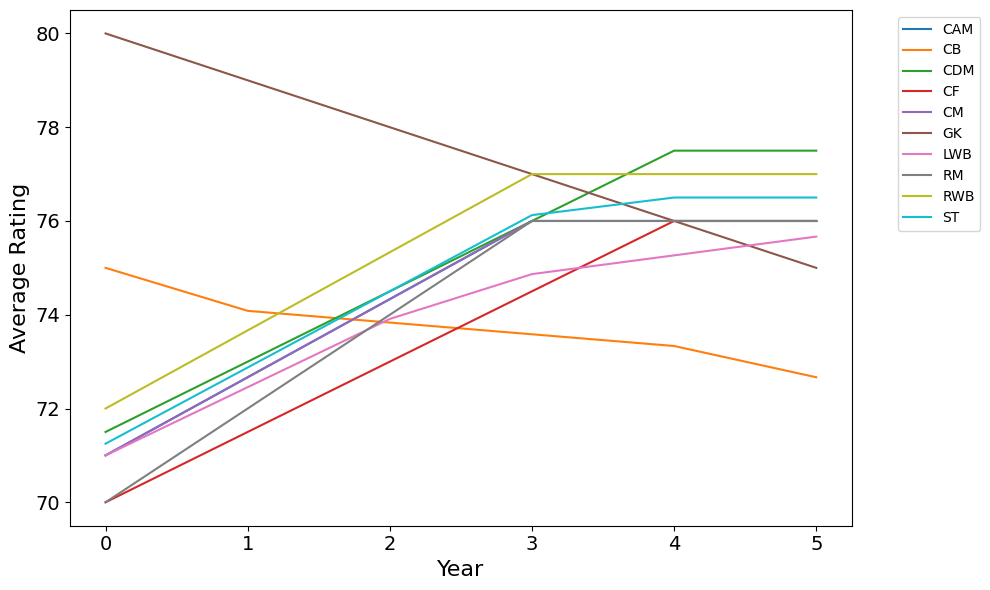

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'man_city' is your DataFrame
# Correctly specify the columns as a list for the mean calculation
grouped = luton.groupby('first_position')[['overall', 'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5']].mean()

# Now, let's plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each row in the grouped DataFrame
for index, row in grouped.iterrows():
    ax.plot(['overall', 'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5'], row, label=index)

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Average Rating', fontsize = 16)
legend  = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='y', which='major', labelsize=14)  
ax.tick_params(axis='x', which='major', labelsize=14)  
plt.xticks(range(6), range(6))
plt.tight_layout()

# Save the figure as a PDF, ensuring the legend is included
plt.savefig('luton.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()


In [110]:

# Specify the columns for which to calculate the mean and std
columns = ['overall', 'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5']

# Calculate the mean and std for the specified columns
mean_values = man_city[columns].mean()
std_values = man_city[columns].std()

# Display the results
print("Average Values:")
print(mean_values)
print("\nStandard Deviation Values:")
print(std_values)


Average Values:
overall      83.275862
forward_1    83.966667
forward_2    84.726437
forward_3    85.158621
forward_4    85.165517
forward_5    84.931034
dtype: float64

Standard Deviation Values:
overall      2.950745
forward_1    2.215471
forward_2    1.881201
forward_3    1.955810
forward_4    2.362244
forward_5    2.603995
dtype: float64


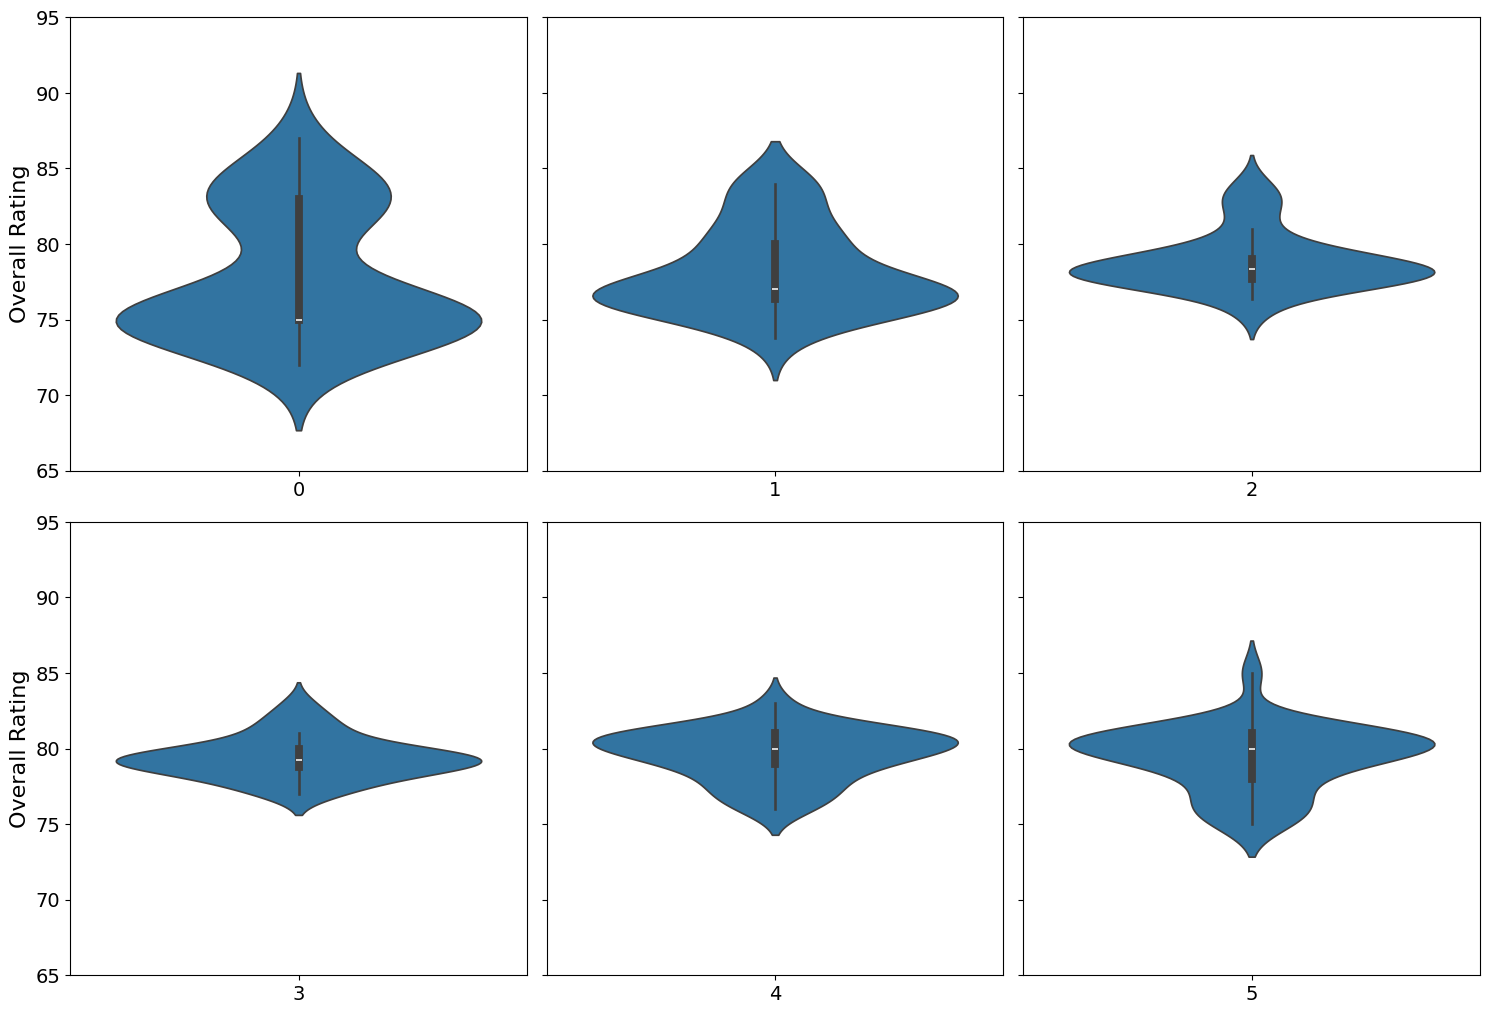

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'man_city' is your DataFrame
columns = ['overall', 'forward_1', 'forward_2', 'forward_3', 'forward_4', 'forward_5']

# Calculate the global minimum and maximum values across the specified columns for a consistent y-axis scale
global_min = 65
global_max = 95

# Setup for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(columns):
        sns.violinplot(data=nottingham, y=columns[i], ax=ax)
        # Set the x-tick to be the index of the column
        ax.set_xticks([0])  # Only one violin plot, so only one tick
        ax.set_xticklabels([i])  # Label with the numeric index
        ax.tick_params(axis='x', which='major', labelsize=14)
        # Ensure all plots have the same y-axis scale
        ax.set_ylim(global_min, global_max)
        
        # Set the y-axis label to 'Overall Rating' only for the first column subplots
        if i % 3 == 0:  # Adjust the modulus operator based on the number of columns
            ax.set_ylabel('Overall Rating', fontsize = 16)
            ax.tick_params(axis='y', which='major', labelsize=14)
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])
    else:
        ax.set_visible(False)  # Hide unused subplots

plt.tight_layout()
plt.savefig('nott_dist.pdf',bbox_inches='tight')
plt.show()


In [130]:
man_city['overall'].mean()

83.27586206896552